<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/RF_shift_fixed_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.ensemble import RandomForestRegressor

In [3]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [4]:
# df = pd.read_csv("Superstore.csv", encoding='windows-1252')
df = pd.read_csv("dados_precipitacao_teste.csv")
print(df.head(3)) # shows headers with top 3 rows

         data  Ent62_SSTtSSA  1_SF  2_SF  3_SF  4_SF      5_SF      7_SF  \
0  2022-11-03       7.454262   0.0   0.0   0.0   0.0  0.000000  0.266250   
1  2022-11-04       6.578652   0.0   0.0   0.0   0.0  0.000000  0.234375   
2  2022-11-05      12.633390   0.0   0.0   0.0   0.0  0.017083  0.254792   

       8_SF      9_SF  ...  Sai62_BalPop  Sai63_BalPop  EntCresc_BalPop  \
0  0.513333  0.807500  ...  7.257745e+14  8.463053e+14     1.572063e+15   
1  0.492917  0.791875  ...  5.409959e+14  7.163564e+14     1.257348e+15   
2  0.454167  0.677708  ...  7.171353e+14  7.372483e+14     1.454377e+15   

      SG_BalPop  SaiCresc_BalPop    End_BalPop  44_Hidrato  \
0  3.535153e+14     1.909924e+15  1.114866e+15    1.483333   
1  5.563443e+14     1.814094e+15  1.709214e+15    2.070000   
2  3.163980e+14     1.771134e+15  1.224233e+15    2.153333   

   DensAparente_Alumina  25_44_SF  25_44_SF_2  
0                 936.0  0.146731    0.021530  
1                 940.0  0.166737    0.027801  
2

In [5]:
time = df['data'].values
X = df.drop(['data','25_44_SF'],axis=1)
#X.index = time
y = df[['25_44_SF']]
nomes = ['25_44_SF']
y.index = time
P = 7 # numero de periodos para tras (trocar pelo desejado)
y_new = {}
y_new[nomes[0]]=y.values
for i in range(P):
  w = '25_44_SF' + str(i+1)
  nomes.append(w)
  y_new[w]= y.shift(i+1).values


In [6]:
dic_ ={}
for i in range(P):
  dic_[nomes[i]] = list(y_new[nomes[i]].reshape(-1))

y = pd.DataFrame(dic_)
#y = np.array(y)

In [7]:
rows, cols = X.shape
X=X.iloc[P:rows,:].copy().reset_index()
y= y.iloc[P:rows,:].copy().reset_index()

In [8]:
rows, cols = X.shape
ntrain = int(rows*0.8)
X_train=X.iloc[0:ntrain,:].copy()
y_train= y.iloc[0:ntrain,:].copy()
X_test=X.drop(X_train.index)
y_test=y.drop(y_train.index)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
y_train

array([[7.00000000e+00, 2.12468871e-01, 2.63493341e-01, ...,
        2.32127695e-01, 1.52118151e-01, 1.66737013e-01],
       [8.00000000e+00, 2.52638580e-01, 2.12468871e-01, ...,
        2.44579106e-01, 2.32127695e-01, 1.52118151e-01],
       [9.00000000e+00, 2.52495541e-01, 2.52638580e-01, ...,
        2.73297257e-01, 2.44579106e-01, 2.32127695e-01],
       ...,
       [2.13000000e+02, 2.67734090e-01, 2.52341143e-01, ...,
        2.16623142e-01, 2.30820108e-01, 2.42358354e-01],
       [2.14000000e+02, 2.52527948e-01, 2.67734090e-01, ...,
        2.23772625e-01, 2.16623142e-01, 2.30820108e-01],
       [2.15000000e+02, 3.29259326e-01, 2.52527948e-01, ...,
        2.38396957e-01, 2.23772625e-01, 2.16623142e-01]])

In [10]:
variaveis = X.columns

In [11]:
X_train.shape # voce tem 241 variaveis: é muita coisa so tem 209 linhas

(209, 241)

In [12]:
#, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#X_train
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
scalerX.fit(X_train)
scalerY.fit(y_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
y_train= scalerY.transform(y_train)
y_test= scalerY.transform(y_test)

In [13]:
model= RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rows,cols = y_test.shape
dic_02 = {}
for j in range(cols):
  print(r2_score(y_test[:,j], y_pred[:,j]))
  dic_02[nomes[j]] = r2_score(y_test[:,j], y_pred[:,j])

-17.14945689404933
0.5120586904074842
0.32235813597521135
0.2767350694724744
0.20312156201536335
0.10560249577772585
0.09354884205684488
0.12106267259800207


In [14]:
pd.Series(dic_02)

25_44_SF    -17.149457
25_44_SF1     0.512059
25_44_SF2     0.322358
25_44_SF3     0.276735
25_44_SF4     0.203122
25_44_SF5     0.105602
25_44_SF6     0.093549
25_44_SF7     0.121063
dtype: float64

In [15]:
y_test.shape

(53, 8)

In [16]:
importances = list(model.feature_importances_)
#print(importances)
dic_03 = {}
k = 0
for w in importances:
  dic_03[variaveis[k]] = w
  k += 1


In [17]:
df1 = pd.Series(dic_03).sort_values(ascending=False)

In [18]:
df1.head(10)

index              0.284019
Sai63_BalPop       0.077148
25_44_SF_2         0.072885
30.2_SF            0.011975
End_BalPop         0.011932
Aglom63_BalPop     0.010967
HXTQ81I_Q          0.008508
34.7_SF            0.007985
25_SF              0.007750
SaiCresc_BalPop    0.007324
dtype: float64

In [19]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
JJ = 1 # trocar este para fazer outros graficos
y_true = scalerY.inverse_transform( y_test)
y_calc = scalerY.inverse_transform(y_pred)

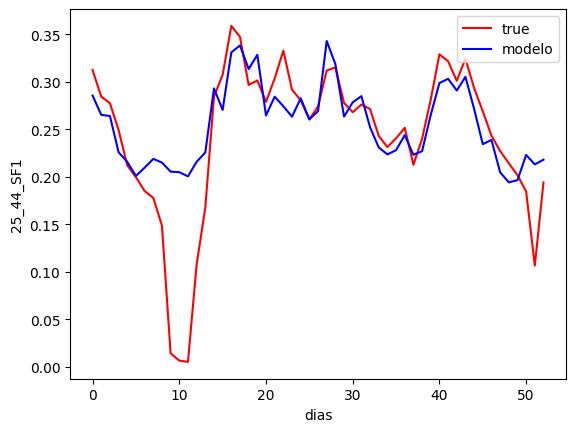

In [21]:
line1, =plt.plot(range(len(y_true[:,JJ])),y_true[:,JJ],c='r')
line2, =plt.plot(range(len(y_calc[:,JJ])),y_calc[:,JJ], c='b')
plt.legend([line1,line2],['true','modelo'],loc='upper right')
plt.xlabel('dias')
plt.ylabel(nomes[JJ])
plt.show()